### Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

#### Read the data

In [ ]:
import pandas as pd                             # imported pandas to analyze and manipulate database
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df.head()                                         # read the data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
df.info() # shows the data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
df.describe() # show statistics about data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


#### Preprocess the data

In [ ]:
df[df.duplicated(keep=False)] ## shows Duplicate values

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
112,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [ ]:
df.drop_duplicates(inplace=True) # drop duplicate record

In [ ]:
df.reset_index(drop=True,inplace=True)  # reset index

In [ ]:
df.nunique() # shows how many unique values are there

Price         236
Age_08_04      77
KM           1263
Fuel_Type       3
HP             12
Automatic       2
cc             13
Doors           4
Cylinders       1
Gears           4
Weight         59
dtype: int64

In [ ]:
df['Cylinders'].unique() # shows unique value

array([4], dtype=int64)

In [ ]:
df.drop('Cylinders',axis=1,inplace=True) # drop cylinder column cuz it has unique value across the column

In [ ]:
df["Fuel_Type"].unique() # shows unique values

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [ ]:
df.corr(numeric_only=True)    # shows correlation matrix

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,0.063831,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,-0.098582,0.058499
cc,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,-0.160101,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,0.021238,1.000000


In [ ]:
df["Fuel_Type"].mode()   # Shows mode

0    Petrol
Name: Fuel_Type, dtype: object

#### Visualize the data

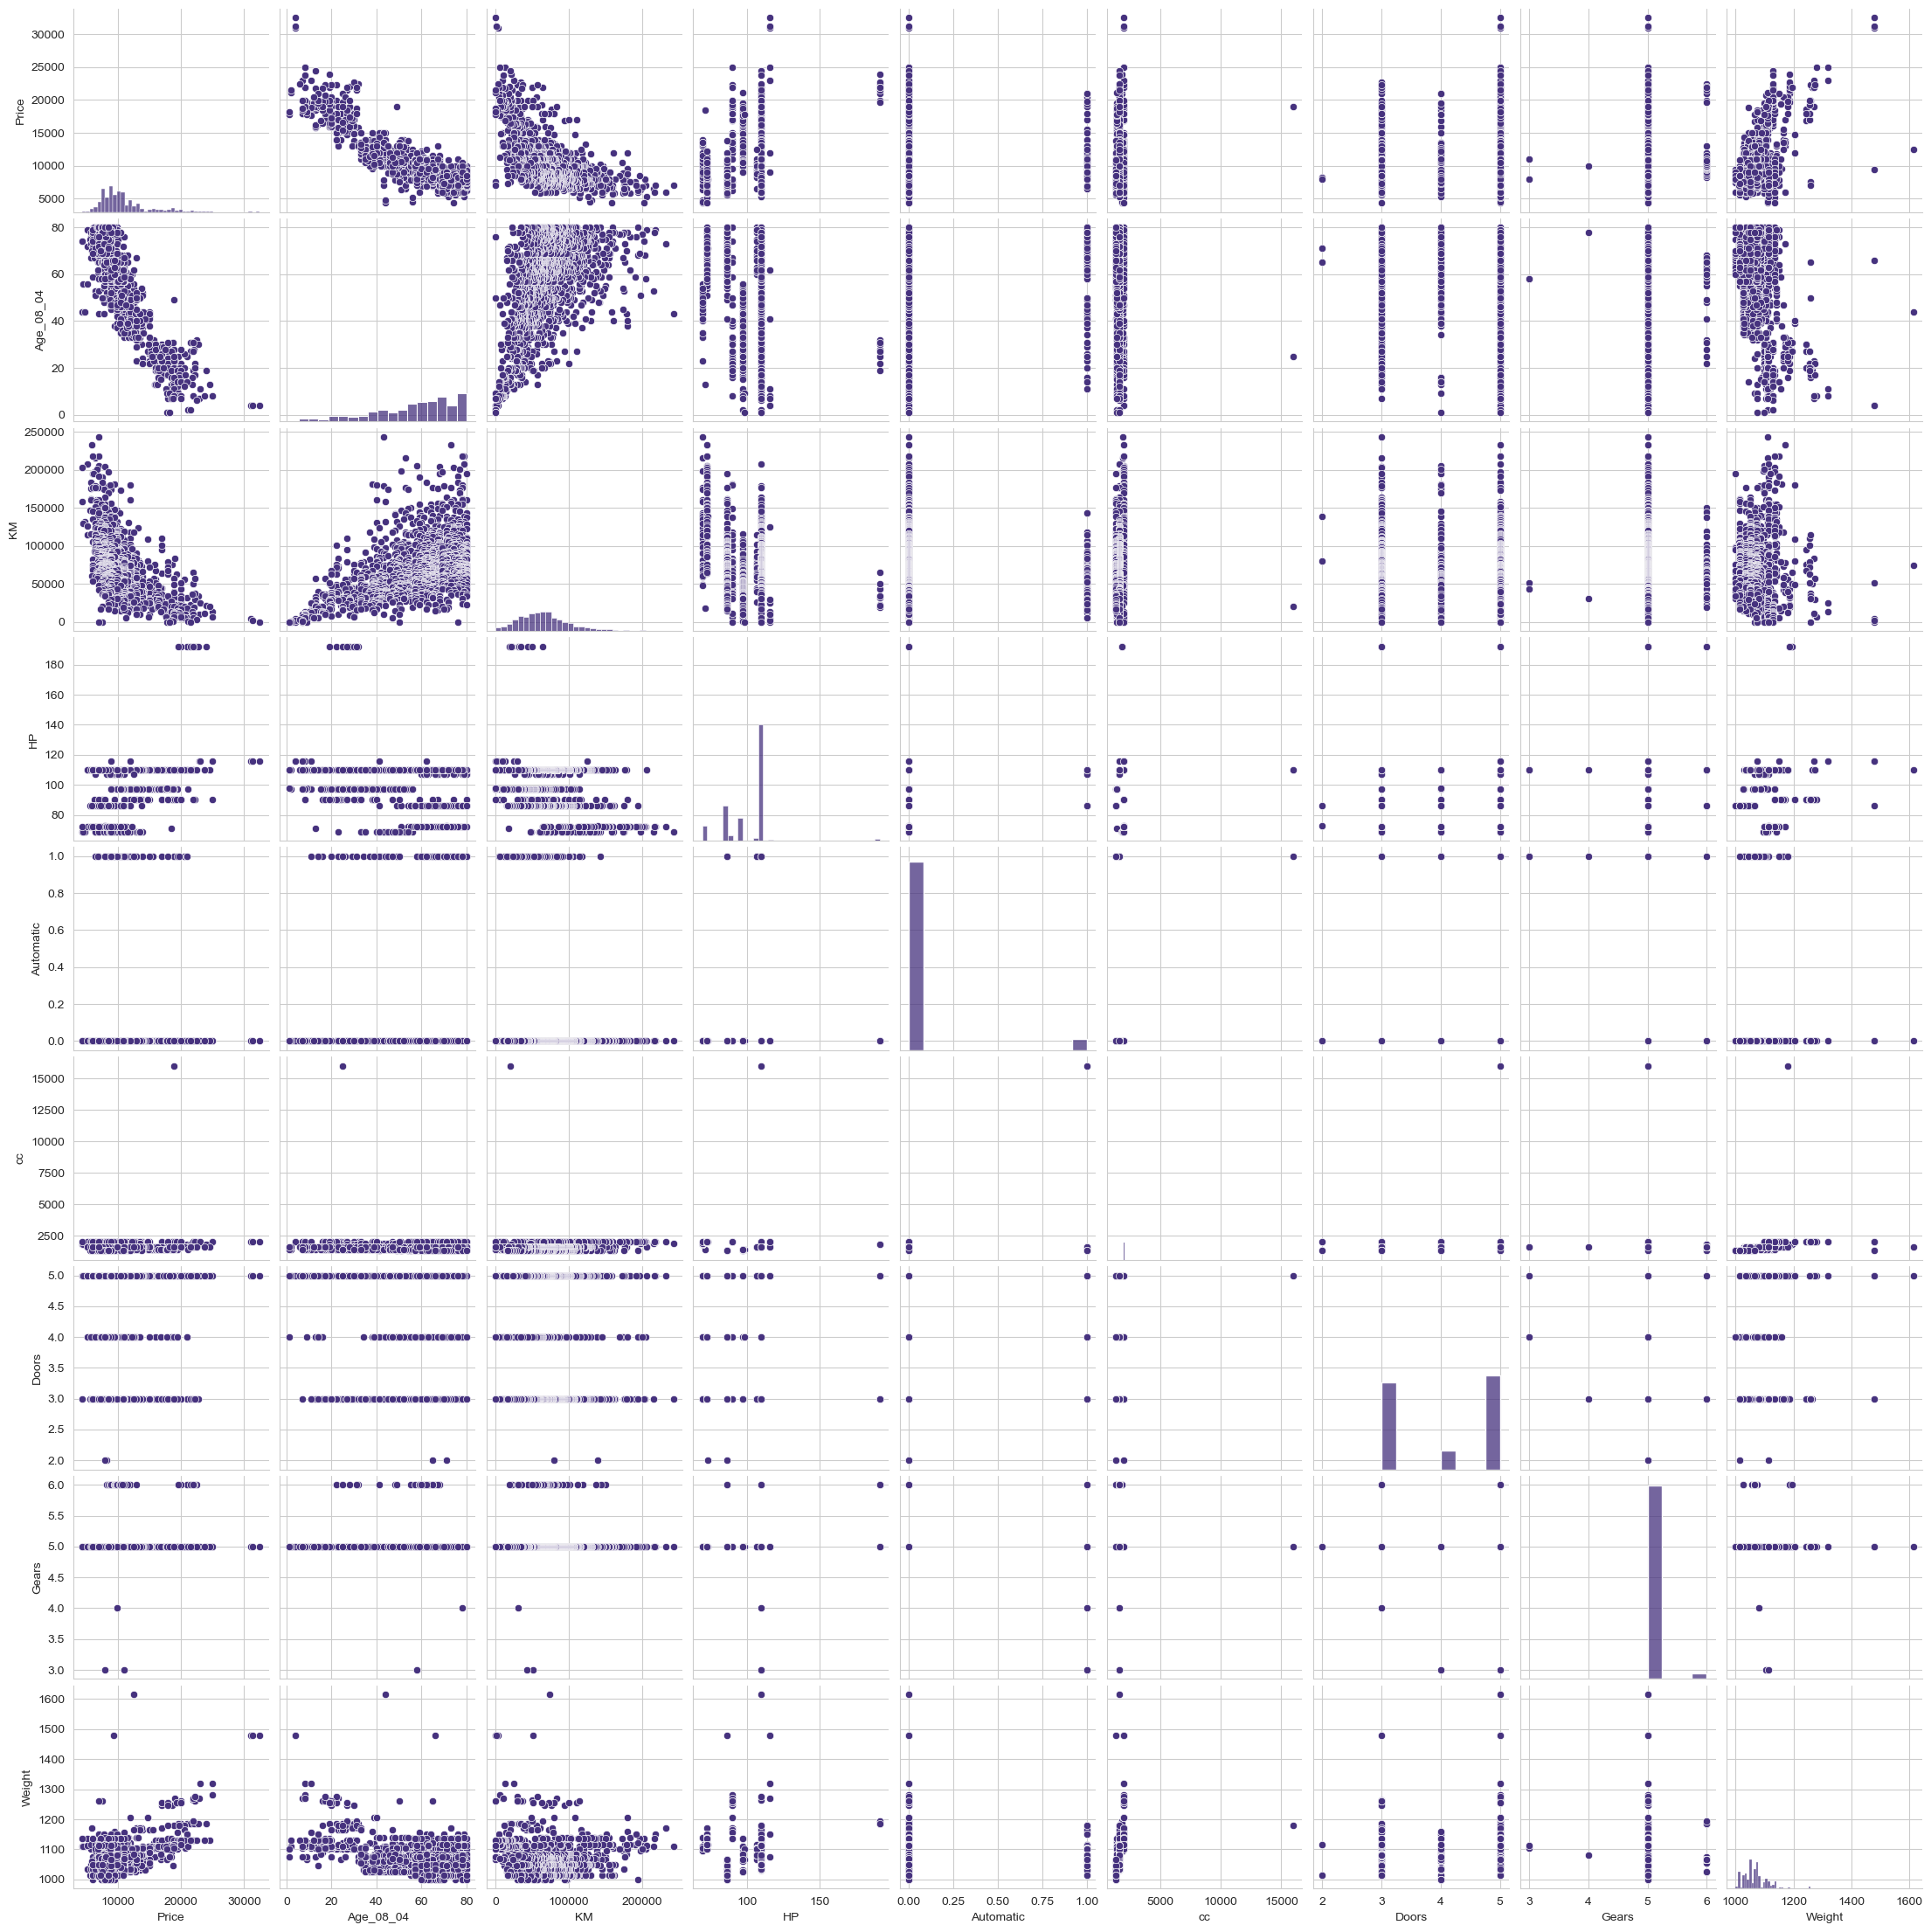

In [ ]:
#Format the plot background and scatter plots for all the variables
import seaborn as sns                    # imported library for visualization
import matplotlib.pyplot as plt
import warnings                          # library
warnings.filterwarnings("ignore",category=FutureWarning)          # ignore warnings future warnings

sns.set_palette('viridis')           # set the color

sns.set_style(style='whitegrid')
sns.pairplot(df)                        # pairplot
plt.show()

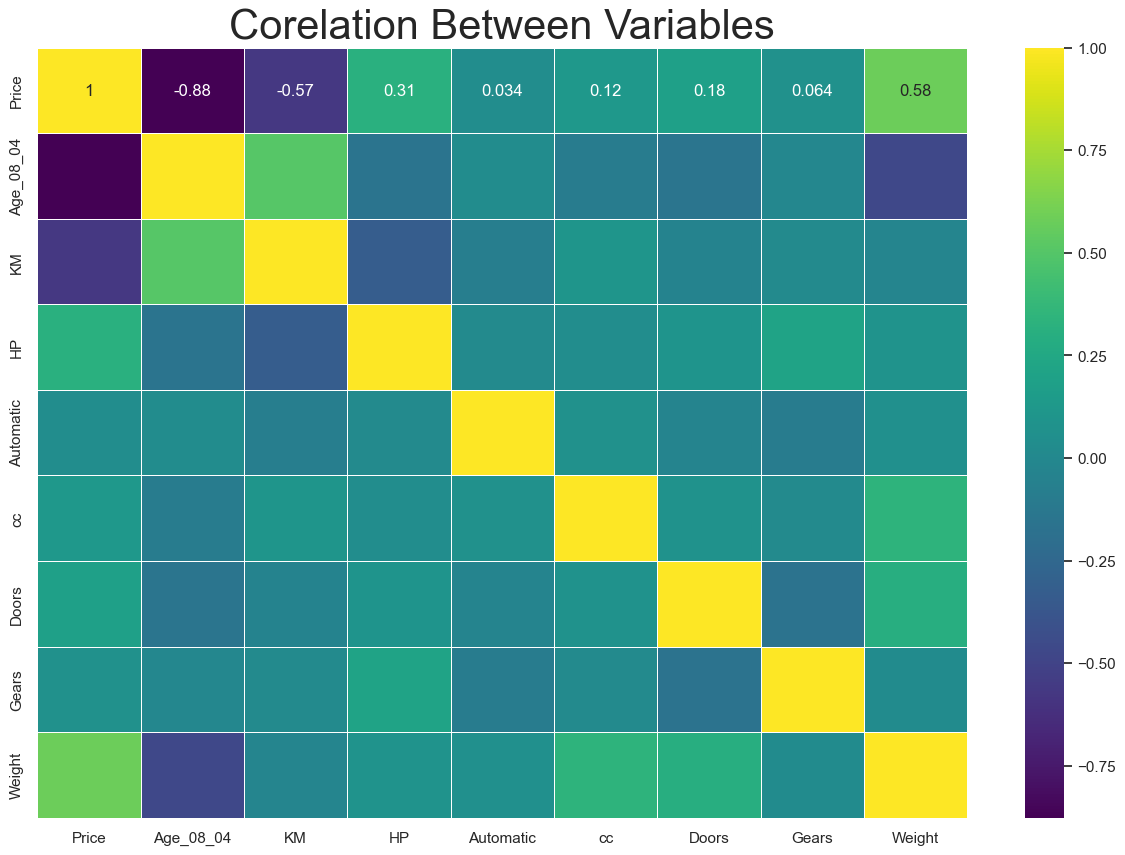

In [ ]:
# correlation heatmaps to explore relationships between pairs of variables.
sns.set(style="white")
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.corr(numeric_only=True), annot = True, linewidths=.5, cmap="viridis")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder # imported library for label encoder

label_encoder = LabelEncoder()    # Initialize the LabelEncoder
 # Fit and transform the column
df['Category_Encoded'] = label_encoder.fit_transform(df['Fuel_Type'])
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight,Category_Encoded
0,13500,23,46986,Diesel,90,0,2000,3,5,1165,1
1,13750,23,72937,Diesel,90,0,2000,3,5,1165,1
2,13950,24,41711,Diesel,90,0,2000,3,5,1165,1
3,14950,26,48000,Diesel,90,0,2000,3,5,1165,1
4,13750,30,38500,Diesel,90,0,2000,3,5,1170,1


In [ ]:
df['Fuel_Type'].value_counts() # shows no of records of particular column in each category

Fuel_Type
Petrol    1264
Diesel     154
CNG         17
Name: count, dtype: int64

In [ ]:
# imbalanced data in fuel_type but we still go with this

In [ ]:
df.drop('Fuel_Type',axis=1,inplace=True) # drop Fuel_type column

In [ ]:
df["Category_Encoded"].unique()       # check the unique values in category_encoded

array([1, 2, 0])

### Build the Model

#### Split data into Traing and testing

In [ ]:
X = df.iloc[:, 1:]       # get columns except Price
y = df['Price']            # only price column

In [ ]:
from sklearn.model_selection import train_test_split  # imported library for spliting the data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) # splited into 80% and 20% , random state for keep same records

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape # show the data shape

((1148, 9), (287, 9), (1148,), (287,))

In [ ]:
from sklearn.linear_model import LinearRegression # imported library for Linear regression model

model1 = LinearRegression()         # Initialize the model

model1.fit(X_train,y_train)         # Fit the model on training data

yhat_train = model1.predict(X_train)  # prediting for train data

yhat_test = model1.predict(X_test)  # prediting for test data

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score           # imported metrix
import math

train_mse = mean_squared_error(y_train, yhat_train)
train_rmse = math.sqrt(train_mse)
R_squared_train = r2_score(y_train, yhat_train)
print("metrix for Train Data :")
print('mean_squared_error (train) : ',train_mse,'\nRoot_mean_squared_error (train) : ',train_rmse,'\nR-squared (train) : ',R_squared_train )

test_mse = mean_squared_error(y_test, yhat_test)
test_rmse = math.sqrt(test_mse)
R_squared_test = r2_score(y_test, yhat_test)
print("\nmetrix for test Data :")
print('mean_squared_error (test) : ',test_mse,'\nRoot_mean_squared_error (test) : ',test_rmse,'\nR-squared (test) : ',R_squared_test )

metrix for Train Data :
mean_squared_error (train) :  1731672.2780530052 
Root_mean_squared_error (train) :  1315.930194977304 
R-squared (train) :  0.8694838434310366

metrix for test Data :
mean_squared_error (test) :  2006554.2201165352 
Root_mean_squared_error (test) :  1416.5289337378658 
R-squared (test) :  0.8327471995993048


### model is  fit....good on training and testing data

In [ ]:
#Reduce Regularization
#Regularization techniques like L1 (Lasso) or L2 (Ridge) regularization can cause underfitting if the penalty is too high. Consider reducing the regularization parameter.
#Ridge Regression: Decrease the value of alpha
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
yhat_train1= model.predict(X_train)  # prediting for train data
print('R-squared:', r2_score(y_train, yhat_train1))     # rsquared value for training data

R-squared: 0.8694838306317283


In [ ]:
yhat_test1= model.predict(X_test)    #prediting for test data
print('R-squared:', r2_score(y_test, yhat_test1))    # rsquared value for test data

R-squared: 0.8327621197437908


In [ ]:
### calculating variance Influence factor for multicollinearity

In [ ]:
def calculate_vif(X): # define function for vif
    vif = []
    for i in range(X.shape[1]):
        # Using Linear Regression to fit the data
        lr = LinearRegression()
        lr.fit(X.drop(X.columns[i], axis=1), X.iloc[:, i])
        # Calculating VIF
        vif.append(1 / (1 - lr.score(X.drop(X.columns[i], axis=1), X.iloc[:, i])))
    return vif

# Calculating VIF for each feature
vif_values = calculate_vif(X)

# Print VIF values
for i, col in enumerate(X.columns):
    print(f"{col}: {vif_values[i]}")

Age_08_04: 1.9098978580768775
KM: 1.9460695457048027
HP: 1.4878127082003825
Automatic: 1.0628958412191822
cc: 1.1683488825592676
Doors: 1.185933133620755
Gears: 1.1136131764754875
Weight: 2.3065289530123443
Category_Encoded: 2.371952567514535


#### VIF values below 5 generally indicate no multicollinearity problem

In [ ]:
# calculating P values and check which columns are not good predictors of price

import numpy as np
import scipy.stats as stats

# Calculate the residuals
residuals = y_train - yhat_train

# Calculate the sum of squared residuals
RSS = np.sum(residuals**2)

# Number of observations and predictors
n = X_train.shape[0]
p = X_train.shape[1]

# Estimate of the variance of the error term
sigma_squared = RSS / (n - p - 1)

# Add a column of ones to X_train for the intercept
X_train_with_intercept = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

# Calculate the covariance matrix of the coefficients
cov_matrix = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept)
standard_errors = np.sqrt(np.diagonal(cov_matrix) * sigma_squared)

# Get the coefficients (including the intercept)
coefficients = np.hstack([model1.intercept_, model1.coef_])

# Calculate t-statistics for each coefficient
t_stats = coefficients / standard_errors

# Calculate p-values
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - p - 1)) for t in t_stats]

# Create a DataFrame for the p-values
column_names = ['Intercept'] + list(X_train.columns)
p_values_df = pd.DataFrame({
    'Feature': column_names,
    'p-Value': p_values
})

print(p_values_df)

            Feature       p-Value
0         Intercept  5.517586e-12
1         Age_08_04  0.000000e+00
2                KM  0.000000e+00
3                HP  3.630429e-13
4         Automatic  3.834744e-02
5                cc  2.835736e-01
6             Doors  1.752754e-01
7             Gears  5.200249e-02
8            Weight  0.000000e+00
9  Category_Encoded  5.964050e-07


### automatic , doors and Category_Encoded are the columns correlation between price is not the good

In [ ]:
print(df['Category_Encoded'].value_counts(),df['Doors'].value_counts(),df['Automatic'].value_counts())  # show unique values in columns with its counts

Category_Encoded
2    1264
1     154
0      17
Name: count, dtype: int64 Doors
5    673
3    622
4    138
2      2
Name: count, dtype: int64 Automatic
0    1355
1      80
Name: count, dtype: int64


In [ ]:
#category_Encoded and Automatic column has imbalanced data

In [ ]:
# creating a MLR model In with Statsmodels without using the automatic,doors and Category_Encoded columns
# so we have to confirm that these are the good predictors of price or not

In [ ]:
X_train["Price"]= y_train  # merge the price column to X_train

In [ ]:
# checking the correaltion between price and category_encoded,doors,and automatic coulmn separately with price
import statsmodels.formula.api as smf     # imported stats model
mlr = smf.ols('Price~Category_Encoded',data=X_train)  # initialize the model
model2c = mlr.fit()     # fit the model

mlr = smf.ols('Price~Doors',data=X_train)  # initialize the model
model2D = mlr.fit()     # fit the model

mlr = smf.ols('Price~Automatic',data=X_train)  # initialize the model
model2A = mlr.fit()     # fit the model

mlr = smf.ols('Price~Category_Encoded+Doors+Automatic',data=X_train)  # initialize the model
model2ADC = mlr.fit()     # fit the model
# printing R_squared values
print("category_encoded : ",model2c.rsquared ,"\nDoors : ",model2D.rsquared,"\naAutomatic : ",model2A.rsquared,"\nCategory_Encoded+Doors+Automatic : ",model2ADC.rsquared)

category_encoded :  1.8334893768456872e-05 
Doors :  0.028840705818011014 
aAutomatic :  0.0027729289197507834 
Category_Encoded+Doors+Automatic :  0.03185491237768889


In [ ]:
#Build model
# without using Category_Encoded+Doors+Automatic columns as they are not good predictors of price
mlr = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Weight',data=X_train)  # initialize the model
model2 = mlr.fit()                # fit the model

In [ ]:
model2.summary()       # model stats

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1225.
Date:                Sat, 06 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:01:58   Log-Likelihood:                -9891.1
No. Observations:                1148   AIC:                         1.980e+04
Df Residuals:                    1141   BIC:                         1.983e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7803.8379   1534.544     -5.085      0.000   -1.08e+04   -4792.993
Age_08_04   -120.5000      2.922    -41.236      0.000    -126.233    -114.766
KM            -0.0201      0.001    -14.870      0.000      -0.023      -0.017
HP            30.5121      2.891     10.553      0.000      24.839      36.185
cc            -0.1190      0.091     -1.314      0.189      -0.297       0.059
Gears        410.6389    227.979      1.801      0.072     -36.665     857.943
Weight        20.2163      0.973     20.770      0.000      18.307      22.126
==============================================================================
Omnibus:                      134.075   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.170
Skew:                          -0.352   Prob(JB):                    1.93e-171
Kurtosis:                       6.992   Cond. No.                     3.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

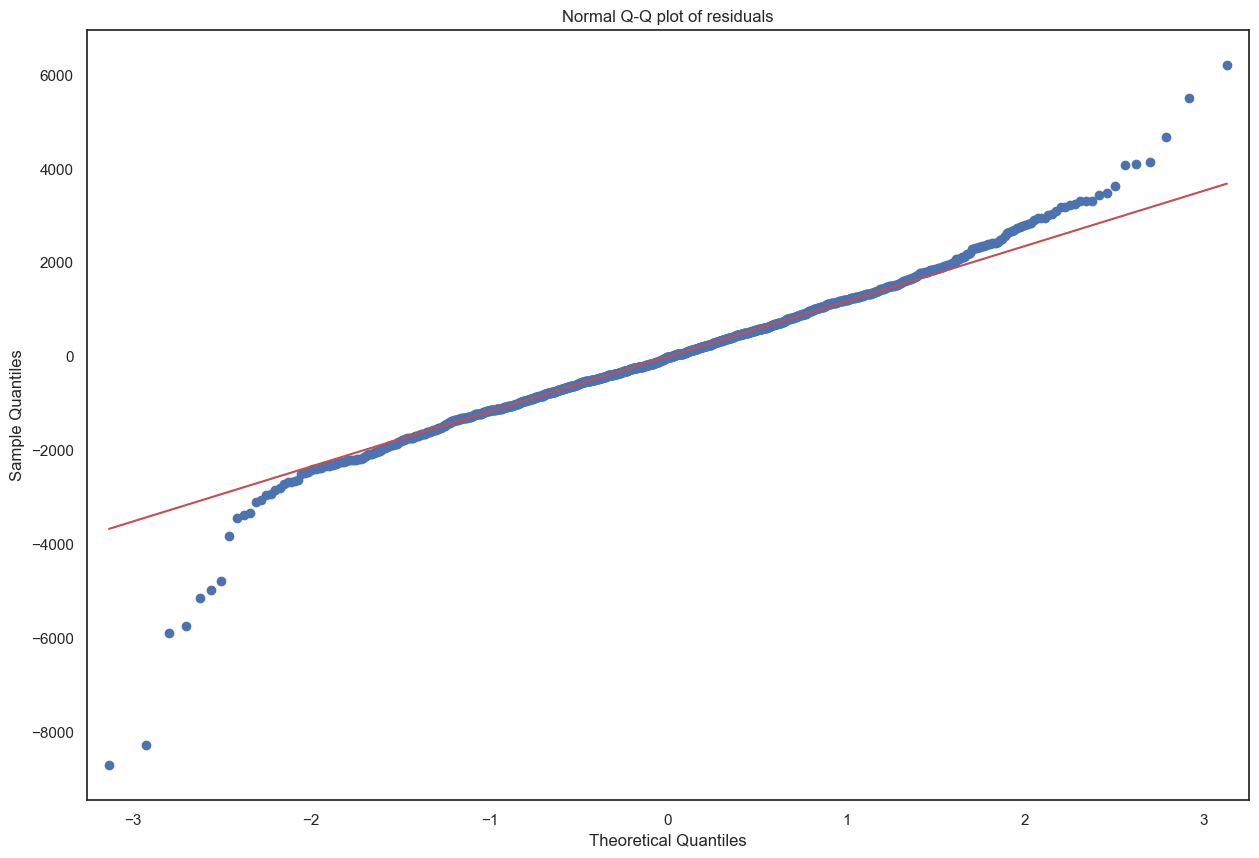

In [ ]:
#normal Q-Q plot for residuals # checkeing the residuals are normally distributed or not
import statsmodels.api as sm
qqplot=sm.qqplot(model2.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()           # function for std values

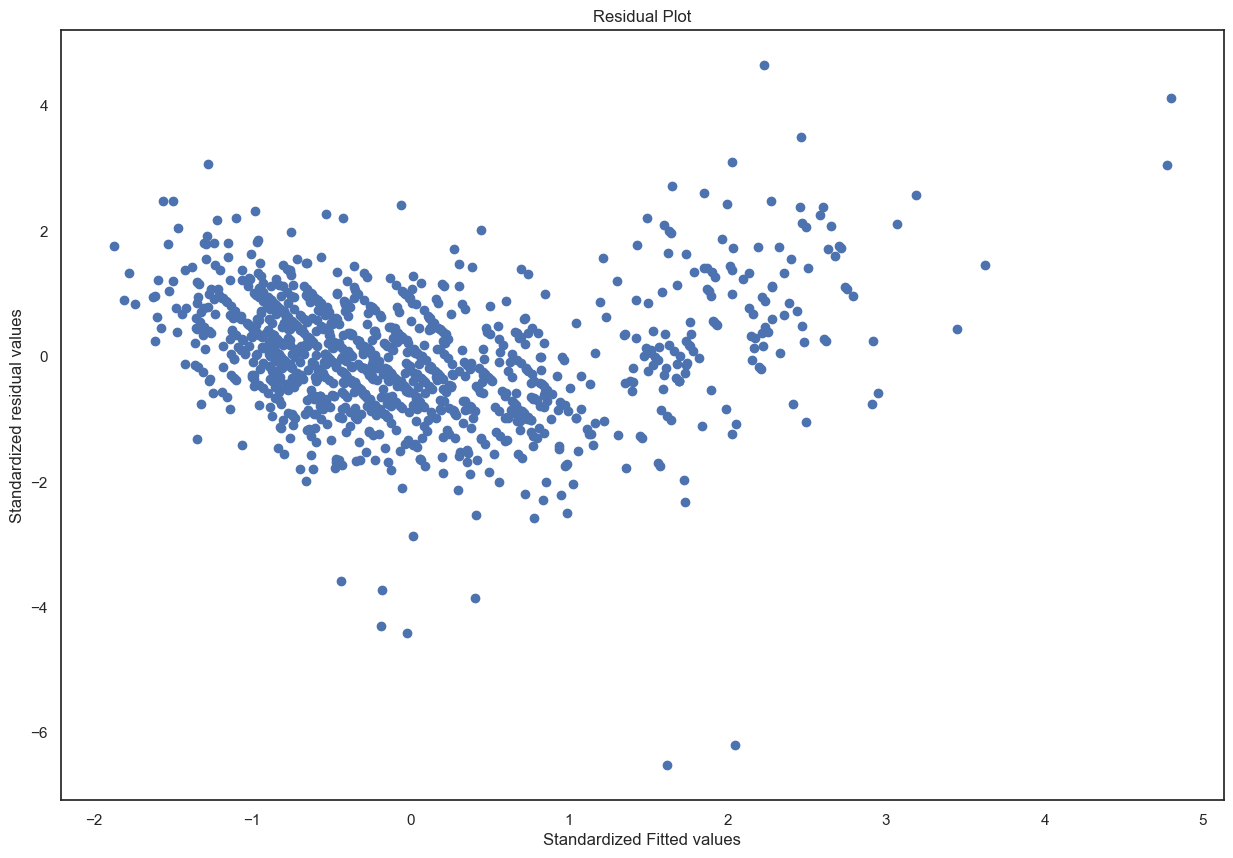

In [ ]:
plt.scatter(get_standardized_values(model2.fittedvalues),
            get_standardized_values(model2.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()                                                  # check the residuals are normally distributed or not

In [ ]:
# influence plot      # checkin the points that are influencing the model
#cooks Distance
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance

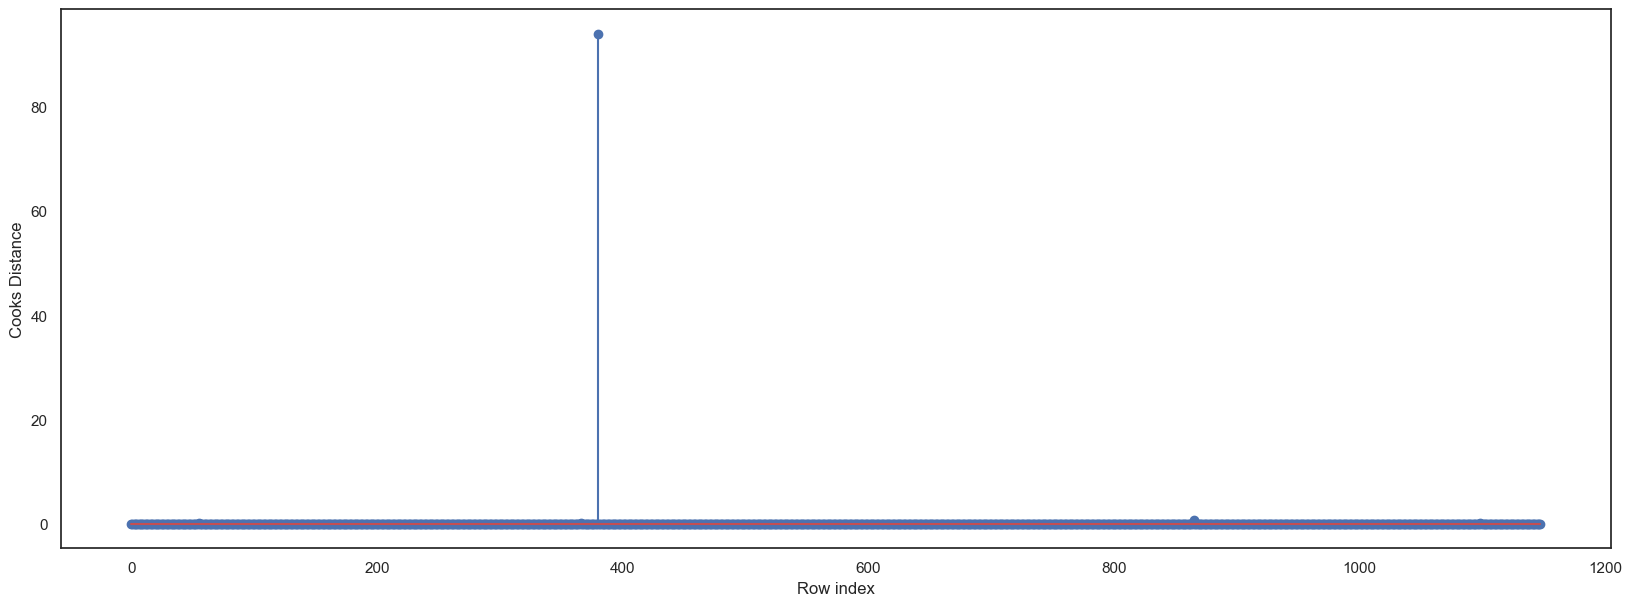

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(X_train)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))                             # the point where cooks distance is more than 0.5

(380, 94.0416127912792)

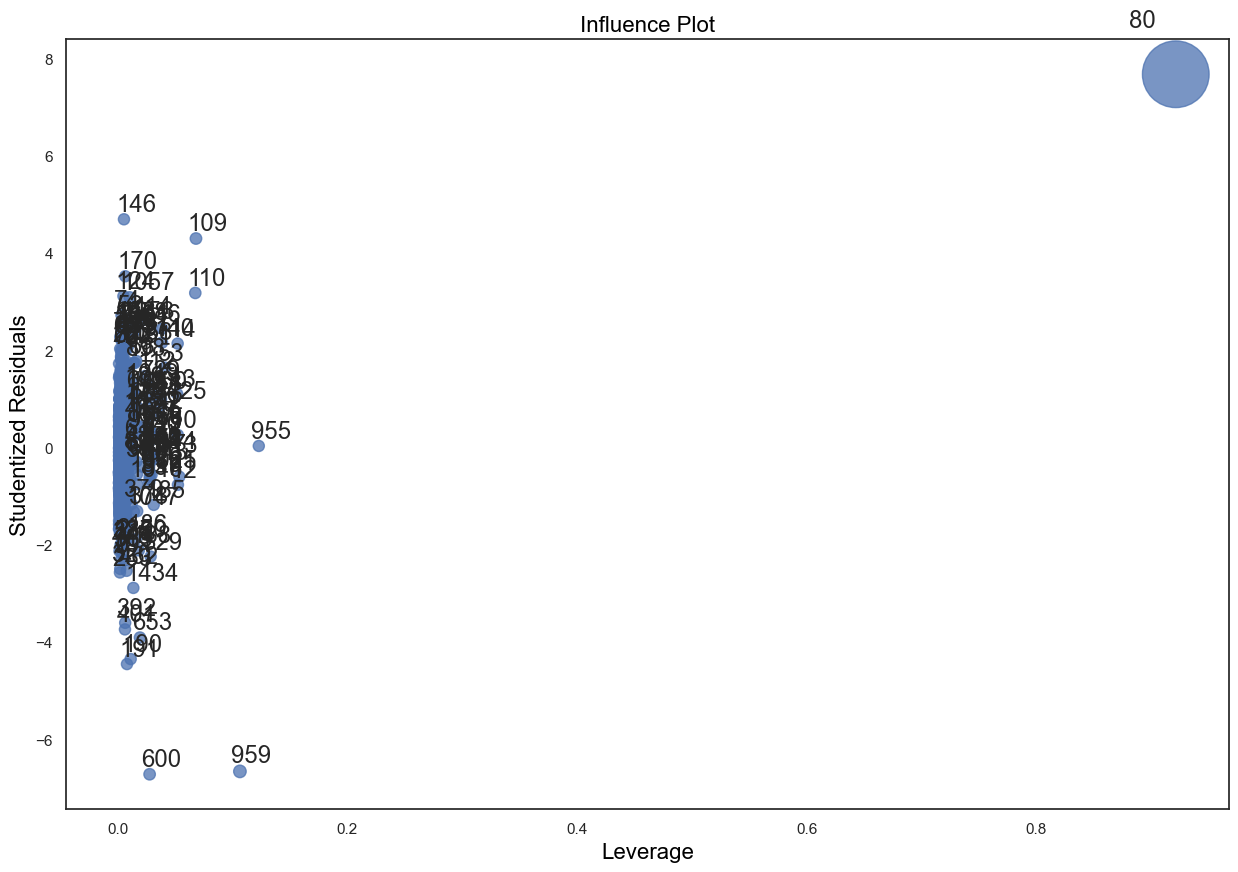

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()                    # High influential points

In [ ]:
k = X_train.shape[1]
n = X_train.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff                   #### 380 is the point is greater than cutoff leverage value

0.028745644599303136

In [ ]:
X_train[X_train.index.isin([380])]

,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Category_Encoded,Price


In [ ]:
df1=X_train.drop(X_train.index[[380]],axis=0).reset_index()   # drop the row 380 as its a influence point

In [ ]:
#Drop the original index
df1=df1.drop(['index'],axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression # imported library for Linear regression model
X = df1.iloc[:, 1:]       # get columns except Price
y = df1['Price']            # only price column

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) # splited into 80% and 20% , random state for keep same records

model3 = LinearRegression()         # Initialize the model

model3.fit(X_train,y_train)         # Fit the model on training data

yhat_train = model3.predict(X_train)  # prediting for train data

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
import math
train_mse = mean_squared_error(y_train, yhat_train)
train_rmse = math.sqrt(train_mse)

print(train_mse,train_rmse)
print('R-squared:', r2_score(y_train, yhat_train))     # rsquared value for training data

2.50127401918959e-20 1.5815416590117348e-10
R-squared: 1.0


In [ ]:
yhat_test = model3.predict(X_test)    # predicting on test data
test_mse = mean_squared_error(y_test,yhat_test)
test_rmse = math.sqrt(test_mse)
print(test_mse,test_rmse)
print('R-squared:', r2_score(y_test, yhat_test))       # rsquared value for testing data

2.6236169410962126e-20 1.6197582971222012e-10
R-squared: 1.0


In [ ]:
#Coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model3.coef_})    # created dataframe
print(coefficients)

           Variable   Coefficient
0                KM -4.176348e-15
1                HP  1.253849e-13
2         Automatic  3.836916e-13
3                cc -1.775390e-15
4             Doors  9.197565e-14
5             Gears  2.568853e-13
6            Weight  5.037302e-15
7  Category_Encoded  2.844715e-13
8             Price  1.000000e+00


In [ ]:
model3.intercept_   # intercept of  the model

2.6921043172478676e-10

In [ ]:
pd.DataFrame({'Actual': y_train,
             'Predicted': yhat_train,
             'Error': y_train-yhat_train})

,Actual,Predicted,Error
331,15800,15800.0,2.364686e-11
984,9450,9450.0,2.382876e-10
591,7450,7450.0,8.731149e-11
1035,11250,11250.0,1.145963e-10
551,8450,8450.0,8.913048e-11
...,...,...,...
1044,9950,9950.0,2.582965e-10
1095,21500,21500.0,-2.073648e-10
1130,7950,7950.0,4.092726e-11
860,10500,10500.0,1.782610e-10


In [ ]:
#Reduce Regularization
#Regularization techniques like L1 (Lasso) or L2 (Ridge) regularization can cause underfitting if the penalty is too high. Consider reducing the regularization parameter.
#Ridge Regression: Decrease the value of alpha
from sklearn.linear_model import Ridge
model3 = Ridge(alpha=0.1)
model3.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
yhat_train1= model3.predict(X_train)  # prediting for train data
print('R-squared:', r2_score(y_train, yhat_train1))     # rsquared value for training data

R-squared: 1.0


In [ ]:
model3.fit(X_test, y_test)           # fitting model on test data
yhat_test1= model3.predict(X_test)    #prediting for test data
print('R-squared:', r2_score(y_test, yhat_test1))    # rsquared value for test data

R-squared: 1.0
